### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


### Read in the data file

In [2]:
df = pd.read_csv('../data/onlinefraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### Data records 

In [4]:
print(f'No. of rows: {df.shape[0]}')
print(f'No. of columns: {df.shape[1]}')

No. of rows: 6362620
No. of columns: 11


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Column Description

- step: Represents a unit of time where 1 step means 1 hour.
- type: Type of transaction.
- amount: Amount of the transaction.
- nameOrig: Customer who started the transaction.
- oldbalanceOrg: Balance amount before transaction.
- newbalanceOrig: Balance amount after transaction.
- nameDest: Recipient of the transaction.
- oldbalanceDest: Initial balance amount of recipient before the transaction.
- newbalanceDest: The new balance amount of recipient after the transaction.
- isFraud: Fraud transaction or not.
- isFlaggedFraud: The flagged fraud transaction where the transaction amount is greater than a threshold value. 





### Data types of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Check for missing values

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no missing values in the data. 

### Description statistics and generate reports

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
# Description statistics for numerical variables and categorical variables

numerical_variables = df.select_dtypes(exclude='object')

categorical_variables = df.select_dtypes(include='object')

In [10]:
# Numerical variables
numerical_variables.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Observations:
- Step starts from 1 and goes till 743 hours.
- 25% of the oldbalangeOrg is 0.
- 50% of the newbalanceOrig is 0.


In [11]:
# Categorical variables
categorical_variables.describe()

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


Observations:
- Most frequent transaction type is CASH_OUT.
- Customers who started the transaction are all not unique, meaning some customers made multiple transactoins, maximum transactions is 3.
- Recipients of the transaction are all not unique, meaning each recipient receives money from multiple customers. 

In [12]:
# Generate report

profile = ProfileReport(df)


In [13]:
# Write the report to a file
profile.to_file('../reports/Reports.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory data analysis and visualization

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
#Categorize 'type' and set order
df['type'] = pd.Categorical(df['type'], categories=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], ordered=True)

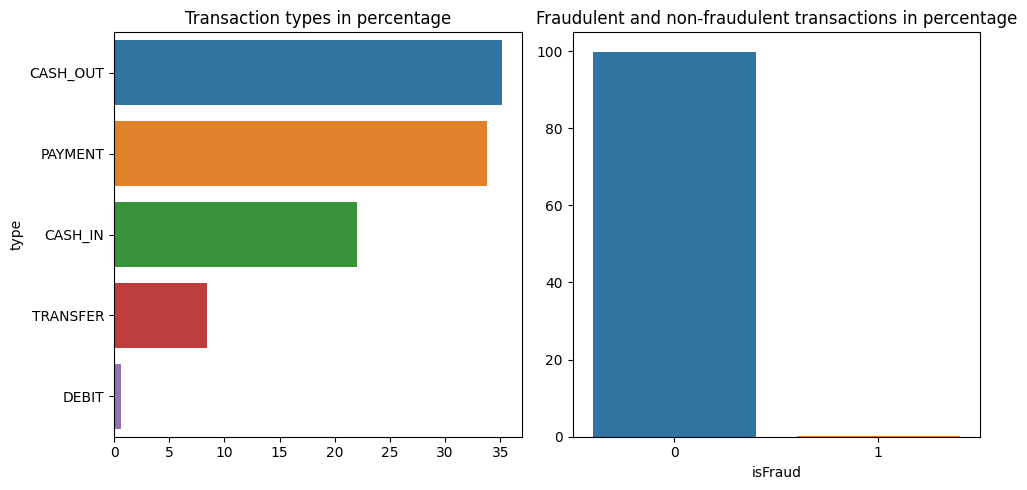

In [16]:
#Create a figure and axis objects using subplots
fig, ax = plt.subplots(1,2, figsize=(10,5))

#Percentage of each transaction
sns.barplot(y=(df['type'].value_counts(normalize=True)*100).index, x=(df['type'].value_counts(normalize=True)*100).values, ax=ax[0])
ax[0].set_title('Transaction types in percentage')
#Percentage of fraud transactions and non-fraud transactions
sns.barplot(x=(df['isFraud'].value_counts(normalize=True)*100).index, y=(df['isFraud'].value_counts(normalize=True)*100).values, ax=ax[1])
ax[1].set_title('Fraudulent and non-fraudulent transactions in percentage')
plt.tight_layout()
plt.show()

#### If a transaction is fraudulent, under what type of transaction the fraud was observed mostly?

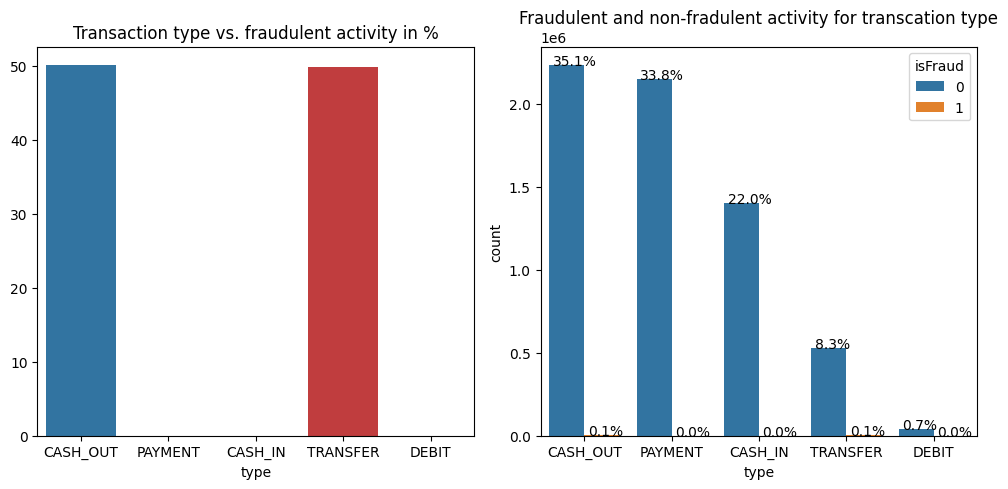

In [17]:
#Fraudulent transactins with respect to transaction type

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.barplot(x=(df[df['isFraud']==1]['type'].value_counts(normalize=True)*100).index, y=(df[df['isFraud']==1]['type'].value_counts(normalize=True)*100).values, ax=ax[0])
ax[0].set_title('Transaction type vs. fraudulent activity in %')

ax[1]=sns.countplot(data=df, x='type', hue = 'isFraud')
total=df.shape[0]
for p in ax[1].patches:
    perct = '{:.1f}%'.format((p.get_height() / total) * 100)
    x = p.get_x() + p.get_width()/10
    y = p.get_y() + p.get_height()
    ax[1].annotate(perct, (x,y))
ax[1].set_title('Fraudulent and non-fradulent activity for transcation type')    

plt.tight_layout()
plt.show()

From the above plot, it is clear that around 50% of the fraudulent activity was observed under CASH_OUT and 
other 50% were observed under TRANSFER. No fraudulent activity was oberseved under PAYMENT, CASH_IN and DEBIT.
The plot on the right shows the fraudulent and non-faudulent activity for each transaction type.

#### What is the amount associated with fraudulent transactions? 

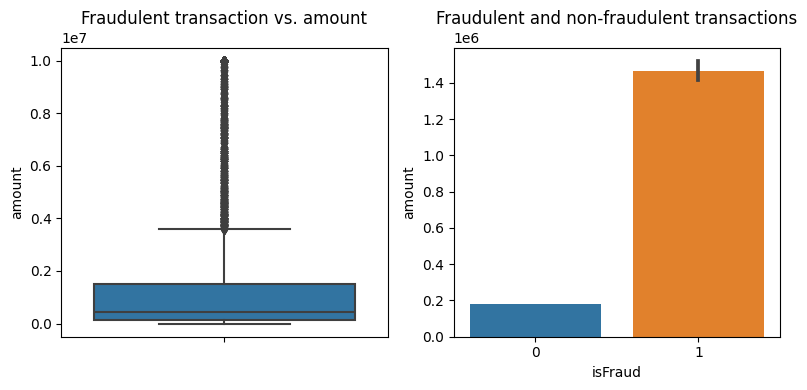

In [18]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

sns.boxplot(data=df[df['isFraud']==1], y = 'amount', ax=ax[0])
ax[0].set_title('Fraudulent transaction vs. amount')

sns.barplot(data=df, x='isFraud', y='amount', ax=ax[1])
ax[1].set_title('Fraudulent and non-fraudulent transactions')
plt.tight_layout()
plt.show()

The mean fraudulent amount is 1,467,967 and maximum amount is 10,000,000.

#### Distribution of all the numerical variables

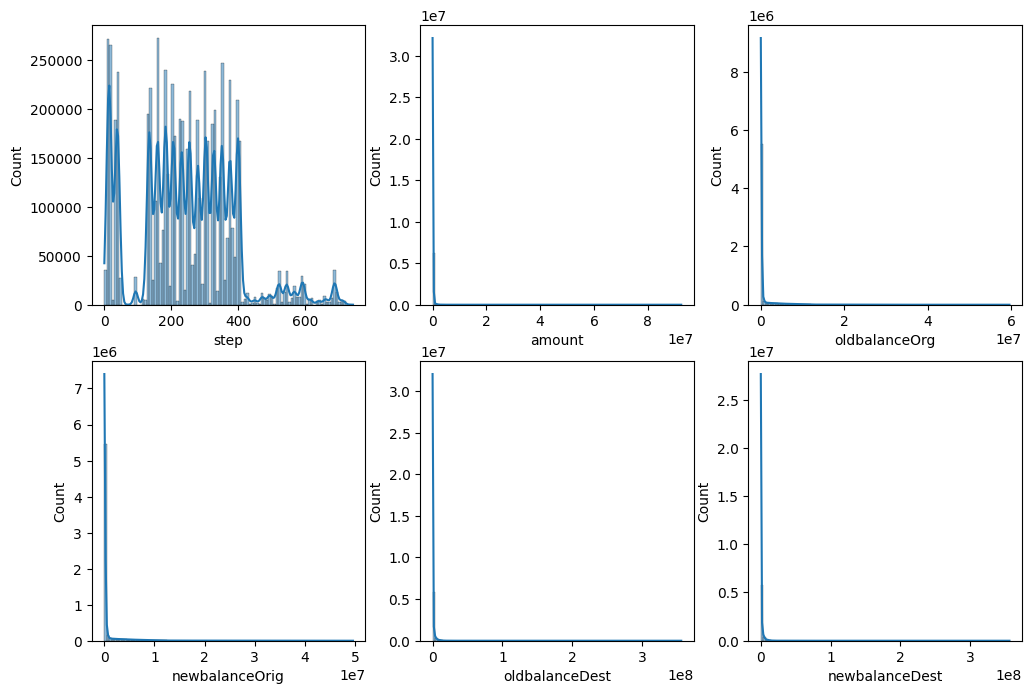

In [19]:
num_variables = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig, ax = plt.subplots(2,3, figsize=(12,8))
ax = ax.flatten()

for i, num_variable in enumerate(num_variables):
    sns.histplot(df[num_variable], kde=True, bins = 100, ax=ax[i])


#### How many of the transactions that were fraud were flagged as fraud i.e, 'isFlaggedFraud'?

In [20]:
pd.crosstab(index=df['isFraud'], columns=df['isFlaggedFraud'])

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


Of the 8213 transactions that were fraudulent only 16 were flagged as fraud i.e., 'isFlaggedFraud' = 1.

#### What is the mininum amount that was flagged as fraudulent transactions? Were all the transactions above this threshold flagged?

In [21]:
print(f"The minimum amount that was flagged: {df[df['isFlaggedFraud']==1]['amount'].min()}")
print(f"The maximum amount that was flagged: {df[df['isFlaggedFraud']==1]['amount'].max()}")

The minimum amount that was flagged: 353874.22
The maximum amount that was flagged: 10000000.0


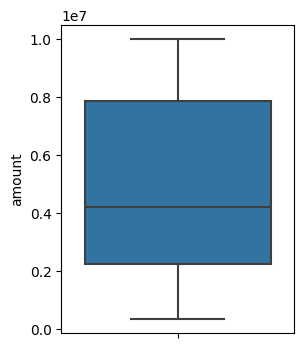

In [22]:
plt.figure(figsize=(3,4))
sns.boxplot(data=df[df['isFlaggedFraud']==1], y = 'amount')
plt.show()

In [23]:
df1 = df[(df['isFraud']==1) & (df['amount']>353874.22)]
df1.shape

(4476, 11)

In [24]:
df1.isFlaggedFraud.sum()

15

The minimum amount that was flagged: 353874.22. But, not all the transactions above this amount were flagged as Fraud i.e., isFlaggedFraud was not equal to 1. There were 4476 transactions where 'isFraud'=1 and 'amount' > 353874.22. Of them only 15 were flagged i.e., 'isFlaggedFraud' is 1. Does the 'oldbalanceOrg' has an effect on being flagged, 'isFlaggedFraud' = 1?


In [25]:
#check if amount is >= oldbalanceOrg when 'isFlaggedFraud'=1
df[df['isFlaggedFraud']==1]['amount'] >= df[df['isFlaggedFraud']==1]['oldbalanceOrg']

2736446     True
3247297     True
3760288     True
5563713     True
5996407    False
5996409    False
6168499     True
6205439     True
6266413     True
6281482    False
6281484    False
6296014     True
6351225     True
6362460    False
6362462    False
6362584     True
dtype: bool

Checked if 'isFlaggedFraud'=1 when 'amount' >= 'oldbalanceOrg'. But, it does not appear like that. Some transactions were flagged as 1 even when the amount is less than their balance.

#### Is there correlation between the features?

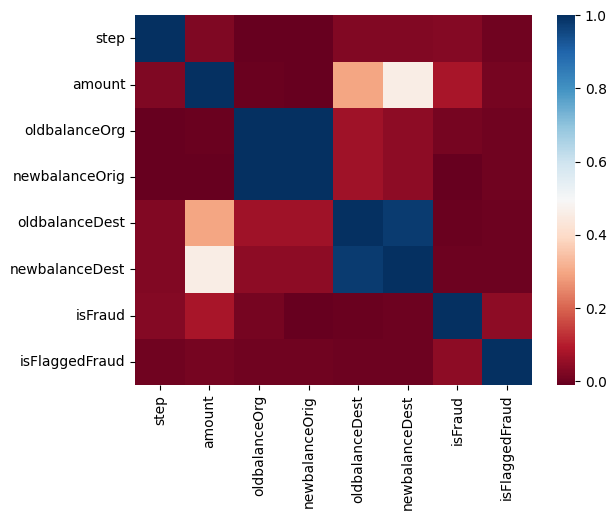

In [26]:
sns.heatmap(numerical_variables.corr(), cmap='RdBu')
plt.show()

From the above heatmap it can be observed that:
- oldbalanceOrg is highly correlated with newbalanceOrig.
- oldbalanceDest is highly correlated with newbalanceDest.

## Key observations

- No missing values in the data.
- Most frequent transaction type is CASH_OUT.
- Around 50% of the fraudulent activity was observed under CASH_OUT and other 50% were observed under TRANSFER. No fraudulent activity was oberseved under PAYMENT, CASH_IN and DEBIT.
- The mean fraudulent amount is 1,467,967 and maximum amount is 10,000,000.
- Of the 8213 transactions that were fraudulent only 16 were flagged as fraud i.e., 'isFlaggedFraud' = 1.
- The minimum amount that was flagged: 353874.22. But, not all the transactions above this amount were flagged as Fraud i.e., isFlaggedFraud was not equal to 1.
- oldbalanceOrg is highly correlated with newbalanceOrig.
- oldbalanceDest is highly correlated with newbalanceDest.
